In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

# Always make it pretty.
plt.style.use('seaborn')


df = pd.read_csv('data/independent-medical-review-imr-determinations-trends.csv', delimiter=',', encoding = 'cp1252')

In [2]:
df.head()

,ReferenceID,ReportYear,DiagnosisCategory,DiagnosisSubCategory,TreatmentCategory,TreatmentSubCategory,Determination,Type,AgeRange,PatientGender,IMRType,DaysToReview,DaysToAdopt,Findings
0,MN19-32164,2019,Skin Disorders,Acne,Reconstr/Plast Proc,Panniculectomy,Upheld Decision of Health Plan,Medical Necessity,31 to 40,Female,Standard,20.0,75,An enrollee has requested authorization and co...
1,EI19-32122,2019,Orth/Musculoskeletal,Hip Problem/Pain,Orthopedic Proc,Hip Replacement,Overturned Decision of Health Plan,Experimental/Investigational,51 to 64,Female,Standard,21.0,88,An enrollee has requested reimbursement for hi...
2,MN19-32086,2019,Orth/Musculoskeletal,Bone Fracture/Break,Transportation,Non Emerg Med (NEMT),Upheld Decision of Health Plan,Medical Necessity,65+,Male,Standard,21.0,78,The patient has requested reimbursement for ai...
3,MN19-32052,2019,GU/ Kidney Disorder,Vaginal Infection,Pharmacy,Hormones,Overturned Decision of Health Plan,Medical Necessity,65+,Female,Standard,20.0,51,Nature of Statutory Criteria/ Case Summary: T...
4,EI19-32051,2019,Cardiac/Circ Problem,Hypertension,Diag Imag & Screen,CT Scan,Upheld Decision of Health Plan,Experimental/Investigational,41 to 50,Female,Standard,21.0,52,An enrollee has requested reimbursement for a ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28048 entries, 0 to 28047
Data columns (total 14 columns):
ReferenceID             28048 non-null object
ReportYear              28048 non-null int64
DiagnosisCategory       28048 non-null object
DiagnosisSubCategory    28027 non-null object
TreatmentCategory       28048 non-null object
TreatmentSubCategory    28047 non-null object
Determination           28048 non-null object
Type                    28048 non-null object
AgeRange                27357 non-null object
PatientGender           27357 non-null object
IMRType                 28048 non-null object
DaysToReview            27387 non-null float64
DaysToAdopt             28048 non-null int64
Findings                28048 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 3.0+ MB


In [277]:
df2 = df[['ReferenceID', 'ReportYear', 'Determination']]

#.count()['ReferenceID']
#df2.sort_values(by='ReportYear', ascending = True, inplace = True)
#df2_ = df2.groupby(['ReportYear'])


df2_ = df2.groupby(['Determination', 'ReportYear']).count()

df2_.reset_index(level=0, inplace=True)

df2_['Result'] = df2_['Determination'].str.find('Overturned')

df2_overturned = df2_[(df2_['Result']==0)]

df2_upheld = df2_[(df2_['Result']<0)]

df2_overturned

,Determination,ReferenceID,Result
ReportYear,,,
2001,Overturned Decision of Health Plan,7,0
2002,Overturned Decision of Health Plan,243,0
2003,Overturned Decision of Health Plan,280,0
2004,Overturned Decision of Health Plan,305,0
2005,Overturned Decision of Health Plan,313,0
2006,Overturned Decision of Health Plan,442,0
2007,Overturned Decision of Health Plan,571,0
2008,Overturned Decision of Health Plan,678,0
2009,Overturned Decision of Health Plan,641,0


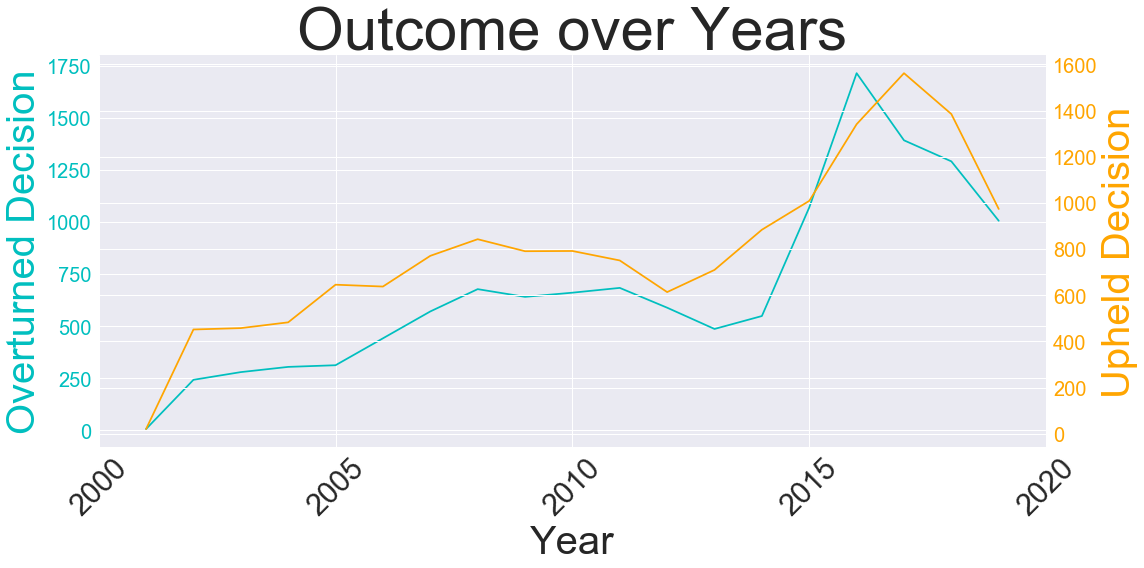

In [422]:
fig, ax1 = plt.subplots(figsize=(16,8))
plt.title('Outcome over Years', size = 60)

color = 'c'
ax1.set_xlabel('Year',size = 40)
ax1.set_ylabel('Overturned Decision', color=color,size=40)
ax1.set_xlim((2000, 2020))
ax1.locator_params(integer=True)
ax1.plot(df2_overturned.index,df2_overturned.ReferenceID, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks(size=20)
plt.xticks(rotation=45,size=30)
ax2 = ax1.twinx()

color2 = 'orange'
ax2.set_ylabel('Upheld Decision', color=color2,size=40)
ax2.plot(df2_overturned.index,df2_upheld.ReferenceID, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.yticks(size=20)
plt.xticks(rotation=45,size=30)

fig.tight_layout()
#fig.savefig('time_vs_decisions.png')
plt.show()

In [279]:
# Use Scatter Plot with difference color for each category to plot the subplots #

df3_ = df[['DiagnosisCategory', 'DiagnosisSubCategory', 'AgeRange', 'PatientGender']]

#df3 = df3_.groupby(['PatientGender', 'DiagnosisCategory'])

df3

'\nQuestion: Is the probability of the next decision being overturned more than probability of it being upheld?\n\npO = Probability of being Overturned\npU = Probability of being Upheld\n\nNull Hypothesis(H0): pO <= 0.5\nAlternate Hypothesis(HA): pO > 0.5\n'

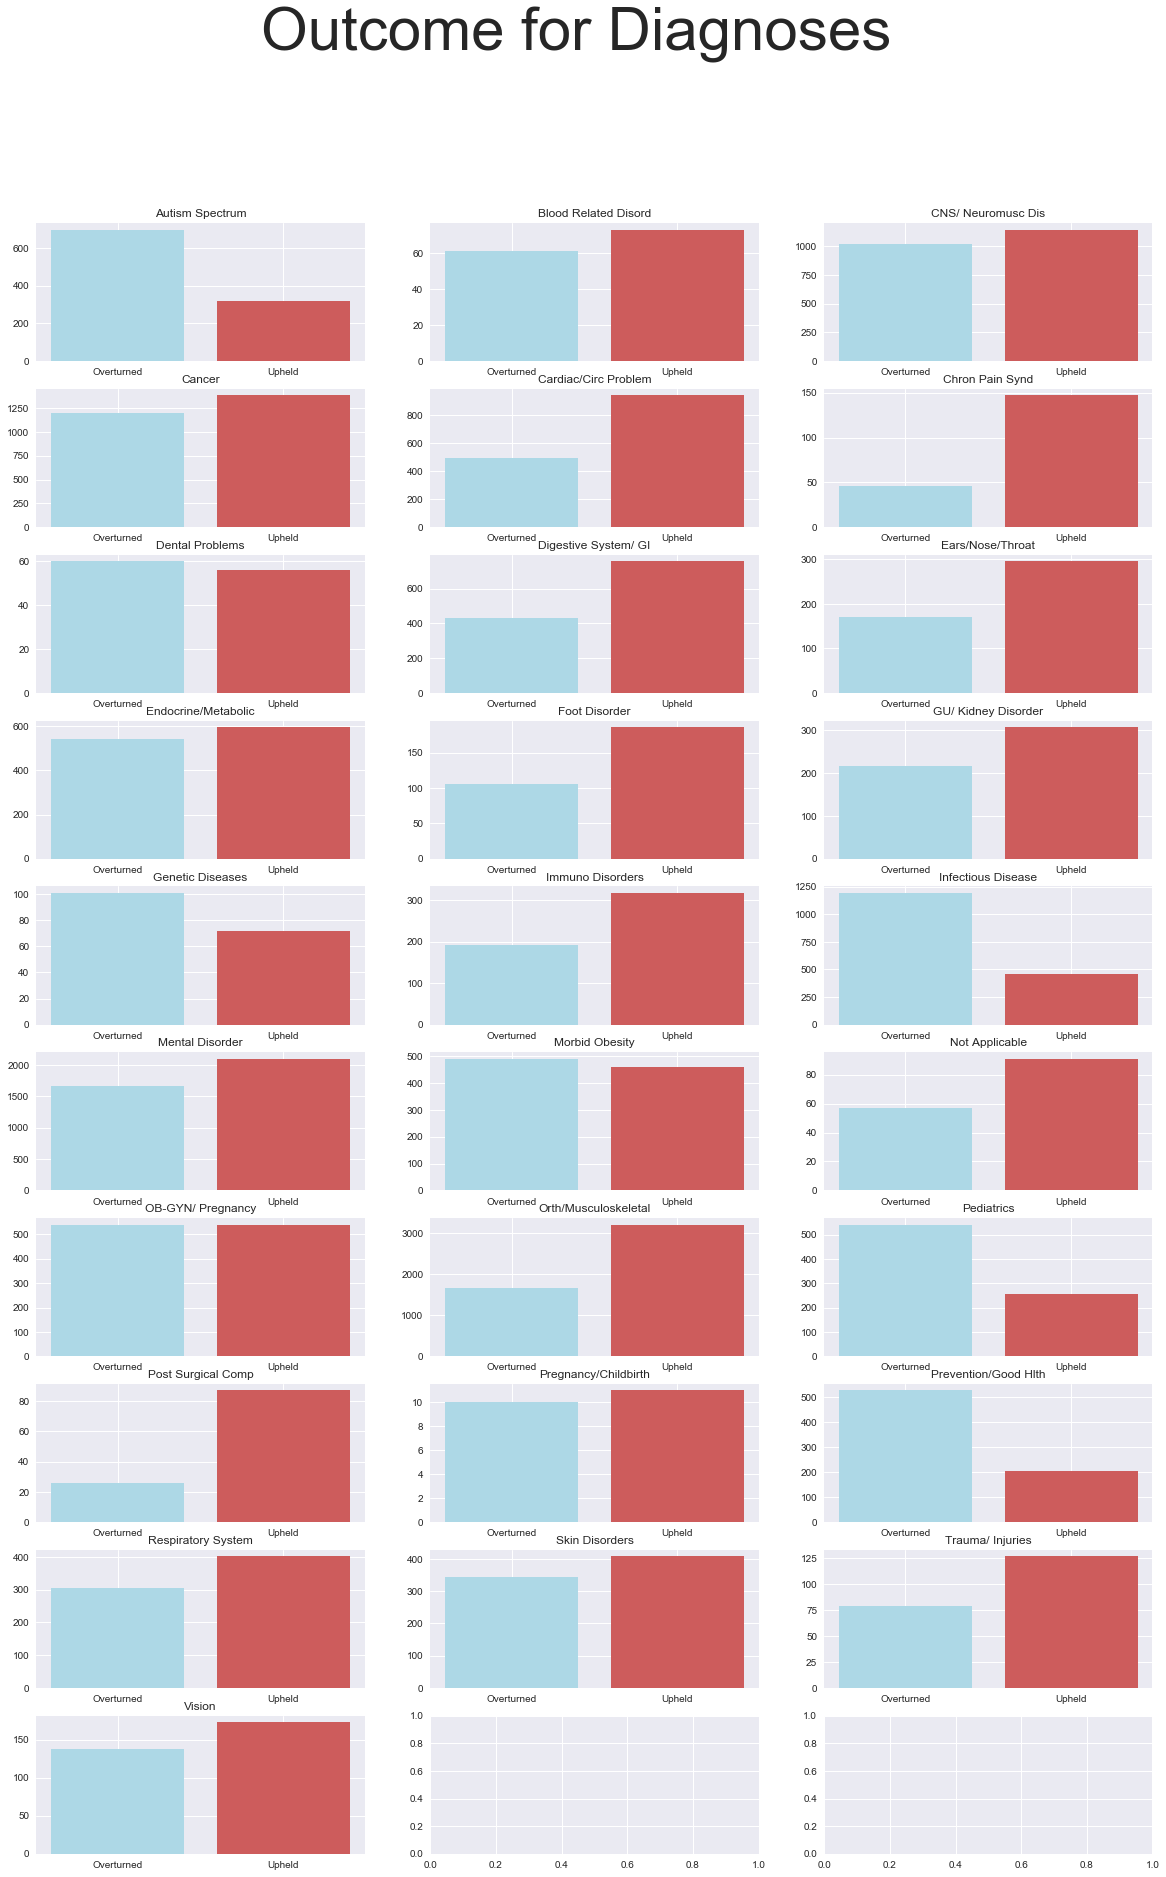

In [424]:
# Number of Insurance rejected in each category of Diagnosis #

# Use Multiple Bar plots  #


df4_ = df[['Determination', 'DiagnosisCategory', 'ReferenceID']]

df4 = df4_.groupby(['DiagnosisCategory', 'Determination']).count()
df4.reset_index(level = 'Determination', inplace = True)

df4['Result'] = df4['Determination'].str.find('Overturned')

df4_overturned = df4[(df4['Result']==0)]
df4_overturned.rename(columns = {'ReferenceID':'Overturned'}, inplace = True)
df4_overturned.drop(columns = ['Determination', 'Result'], inplace = True)

df4_upheld = df4[(df4['Result']<0)]
df4_upheld.rename(columns = {'ReferenceID':'Upheld'}, inplace = True)
df4_upheld.drop(columns = ['Determination', 'Result'], inplace = True)

df4_merged = pd.merge(df4_overturned, df4_upheld, how = 'left', on = 'DiagnosisCategory')

df4_merged['Result'] = df4_merged.index.str.find('Autism')

df_sample = df4_merged[(df4_merged['Result']==0)]


### This works as well ###

fig, axs = plt.subplots(10, 3, figsize = (20,30))
fig.suptitle('Outcome for Diagnoses', size = 60)

for ax, i in zip(axs.flat, df4_merged.index):
    ax.bar(['Overturned'], [df4_merged.loc[i,'Overturned']],color='lightblue')
    ax.bar(['Upheld'], [df4_merged.loc[i,'Upheld']],color='indianred')
    ax.set_title(i)

#fig.savefig('diagnosis_vs_decisions.png')

### This works ###

# for i in df4_merged.index:
#     fig = plt.figure(figsize=(8,4))
#     plt.bar(['Overturned', 'Upheld'], [df4_merged.Overturned[i], df4_merged.Upheld[i]],color='lightblue')
#     plt.xticks(size=20,rotation=45)
#     plt.yticks(size=20)
#     plt.title(i,size=30)

'''
Question: Is the probability of the next decision being overturned more than probability of it being upheld?

pO = Probability of being Overturned
pU = Probability of being Upheld

Null Hypothesis(H0): pO <= 0.5
Alternate Hypothesis(HA): pO > 0.5
'''

In [329]:
# Determination according to the Age Group #

# Use Dual BAR Chart #

df5_ = df[['AgeRange', 'Determination', 'ReferenceID']]

df5 = df5_.groupby(['Determination', 'AgeRange']).count()
df5.reset_index(level = 'Determination', inplace = True)

df5['Result'] = df5['Determination'].str.find('Overturned')

df5_overturned = df5[(df5['Result']==0)]
df5_overturned.rename(columns = {'ReferenceID':'Overturned'}, inplace = True)
df5_overturned.drop(columns = ['Determination', 'Result'], inplace = True)

df5_upheld = df5[(df5['Result']<0)]
df5_upheld.rename(columns = {'ReferenceID':'Upheld'}, inplace = True)
df5_upheld.drop(columns = ['Determination', 'Result'], inplace = True)

df5_merged = pd.merge(df5_overturned, df5_upheld, how = 'left', on = 'AgeRange')

df5_merged




,Overturned,Upheld
AgeRange,,
0 to 10,1475,739
11 to 20,1345,1456
21 to 30,1062,1280
31 to 40,1478,1792
41 to 50,2126,2994
51 to 64,4738,5712
65+,466,694


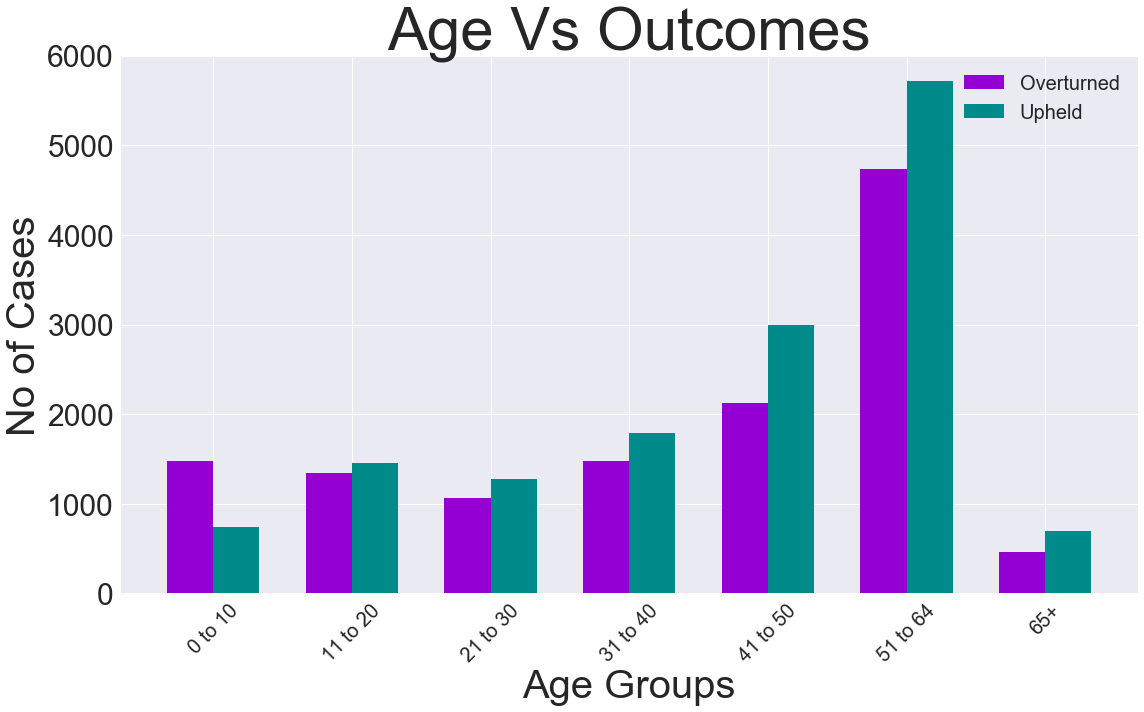

In [426]:
fig, ax5 = plt.subplots(figsize=(16,10))

indices = range(len(df5_merged.index))
width = np.min(np.diff(indices))/3.
ax5.set_xlabel('Age Groups',size = 40)
ax5.set_ylabel('No of Cases',size=40)
plt.title('Age Vs Outcomes', size = 60)
ax5.bar(indices-width/2,df5_merged.Overturned,width,color='darkviolet',label='Overturned')
ax5.bar(indices+width/2.,df5_merged.Upheld,width,color='darkcyan',label='Upheld')
ax5.set_xticklabels(df5_merged.index.unique())
ax5.tick_params(axis='y')

# ax5.bar(['Overturned'], df5_merged.Overturned,color='darkviolet')
# ax5.bar(['Upheld'], df5_merged.Upheld,color='darkcyan')

plt.yticks(size=30)
plt.xticks(range(len(df5_merged.index)), rotation=45,size=20)
ax5.legend(prop={'size': 20})
fig.tight_layout()


#fig.savefig('age_vs_decisions.png')

In [364]:
# df6_ = df[['AgeRange', 'DiagnosisCategory', 'ReferenceID']]

# df6 = df6_.groupby(['DiagnosisCategory', 'AgeRange']).count()
# df6.reset_index(level = 'DiagnosisCategory', inplace = True)

# # df6['Result'] = df6['Determination'].str.find('Overturned')

# # df6_overturned = df6[(df6['Result']==0)]
# # df6_overturned.rename(columns = {'ReferenceID':'Overturned'}, inplace = True)
# # df6_overturned.drop(columns = ['Determination', 'Result'], inplace = True)

# # df6_upheld = df6[(df6['Result']<0)]
# # df6_upheld.rename(columns = {'ReferenceID':'Upheld'}, inplace = True)
# # df6_upheld.drop(columns = ['Determination', 'Result'], inplace = True)

# # df6_merged = pd.merge(df6_overturned, df6_upheld, how = 'left', on = 'AgeRange')

# df6_

,ReferenceID
AgeRange,
0 to 10,2214
11 to 20,2801
21 to 30,2342
31 to 40,3270
41 to 50,5120
51 to 64,10450
65+,1160


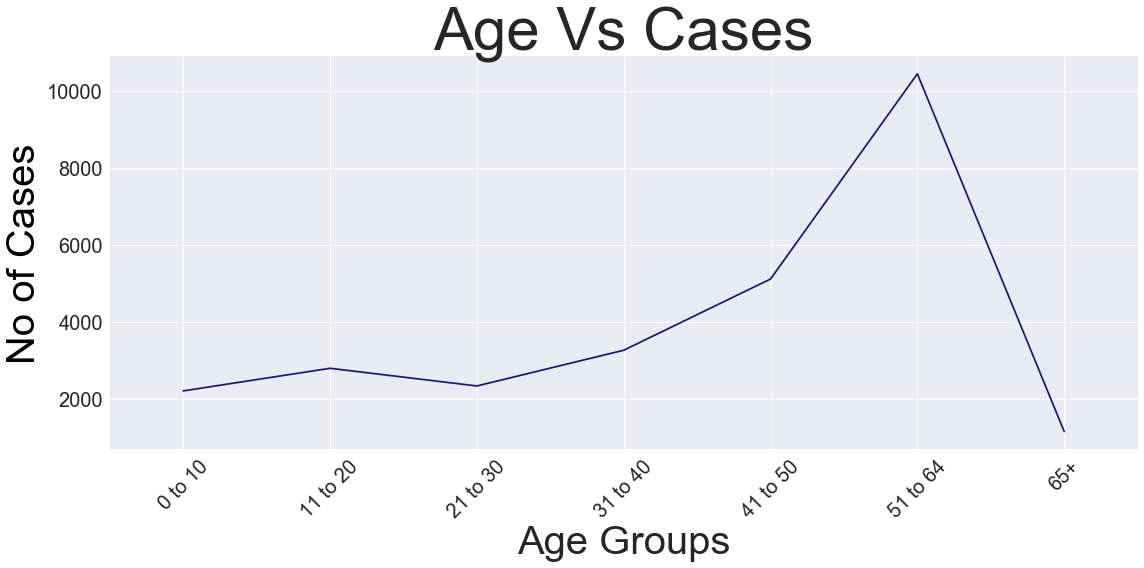

In [433]:
df7_ = df[['AgeRange', 'ReferenceID']]

df7 = df7_.groupby(['AgeRange']).count()

fig, ax7 = plt.subplots(figsize=(16,8))

color = 'c'
ax7.set_xlabel('Age Groups',size = 40)
ax7.set_ylabel('No of Cases', color='black',size=40)
plt.title('Age Vs Cases', size = 60)
ax7.set_xlim((-0.5, 6.5))
ax7.locator_params(integer=True)
ax7.plot(df7.index,df7.ReferenceID, color='midnightblue')
plt.yticks(size=20)
plt.xticks(rotation=45,size=20)

fig.tight_layout()

#fig.savefig('age_vs_cases.png')

df7